In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #202331221_Muhammad Ihsan Hafizh

(2000, 2000)


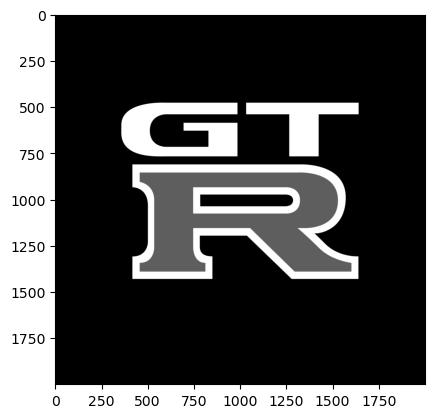

In [2]:
citra_b = cv2.imread("gtr.png")
citra_b = cv2.cvtColor(citra_b,cv2.COLOR_BGR2GRAY)
print(citra_b.shape)

plt.imshow(citra_b, cmap = "gray") #202331221_Muhammad Ihsan Hafizh

In [3]:
kernel = np.array([[-1,0,-1],[0,4,0],[-1,0,-1]]) #202331221_Muhammad Ihsan Hafizh

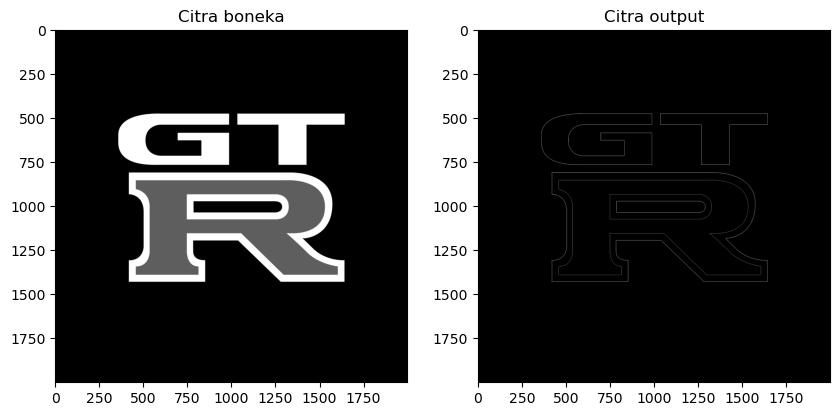

In [4]:
citraOutput = cv2.filter2D(citra_b, -1, kernel) #202331221_Muhammad Ihsan Hafizh

fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(citra_b, cmap = "gray")
ax[0].set_title("Citra boneka")

ax[1].imshow(citraOutput, cmap = "gray")
ax[1].set_title("Citra output")

plt.show()

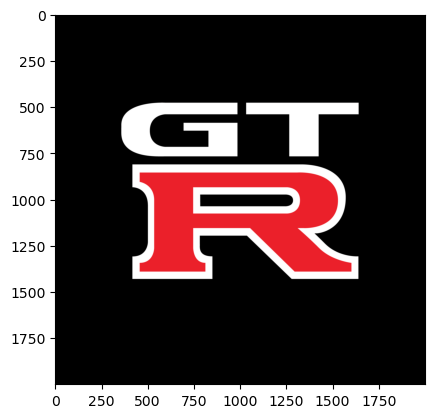

In [5]:
citra_r = cv2.imread("gtr.png")
citra_r = cv2.cvtColor(citra_r, cv2.COLOR_BGR2RGB)

plt.imshow(citra_r)
plt.show() #202331221_Muhammad Ihsan Hafizh

In [6]:
from skimage.util import random_noise #202331221_Muhammad Ihsan Hafizh

In [7]:
noise_img_snp = random_noise(citra_r, mode = "s&p", amount = 0.2)

noise_img_gaussian = random_noise(citra_r, 
                                  mode = "Gaussian", mean = 0, var = 0.01)

noise_img_speckle = random_noise(citra_r, mode = "speckle")

noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8') #202331221_Muhammad Ihsan Hafizh

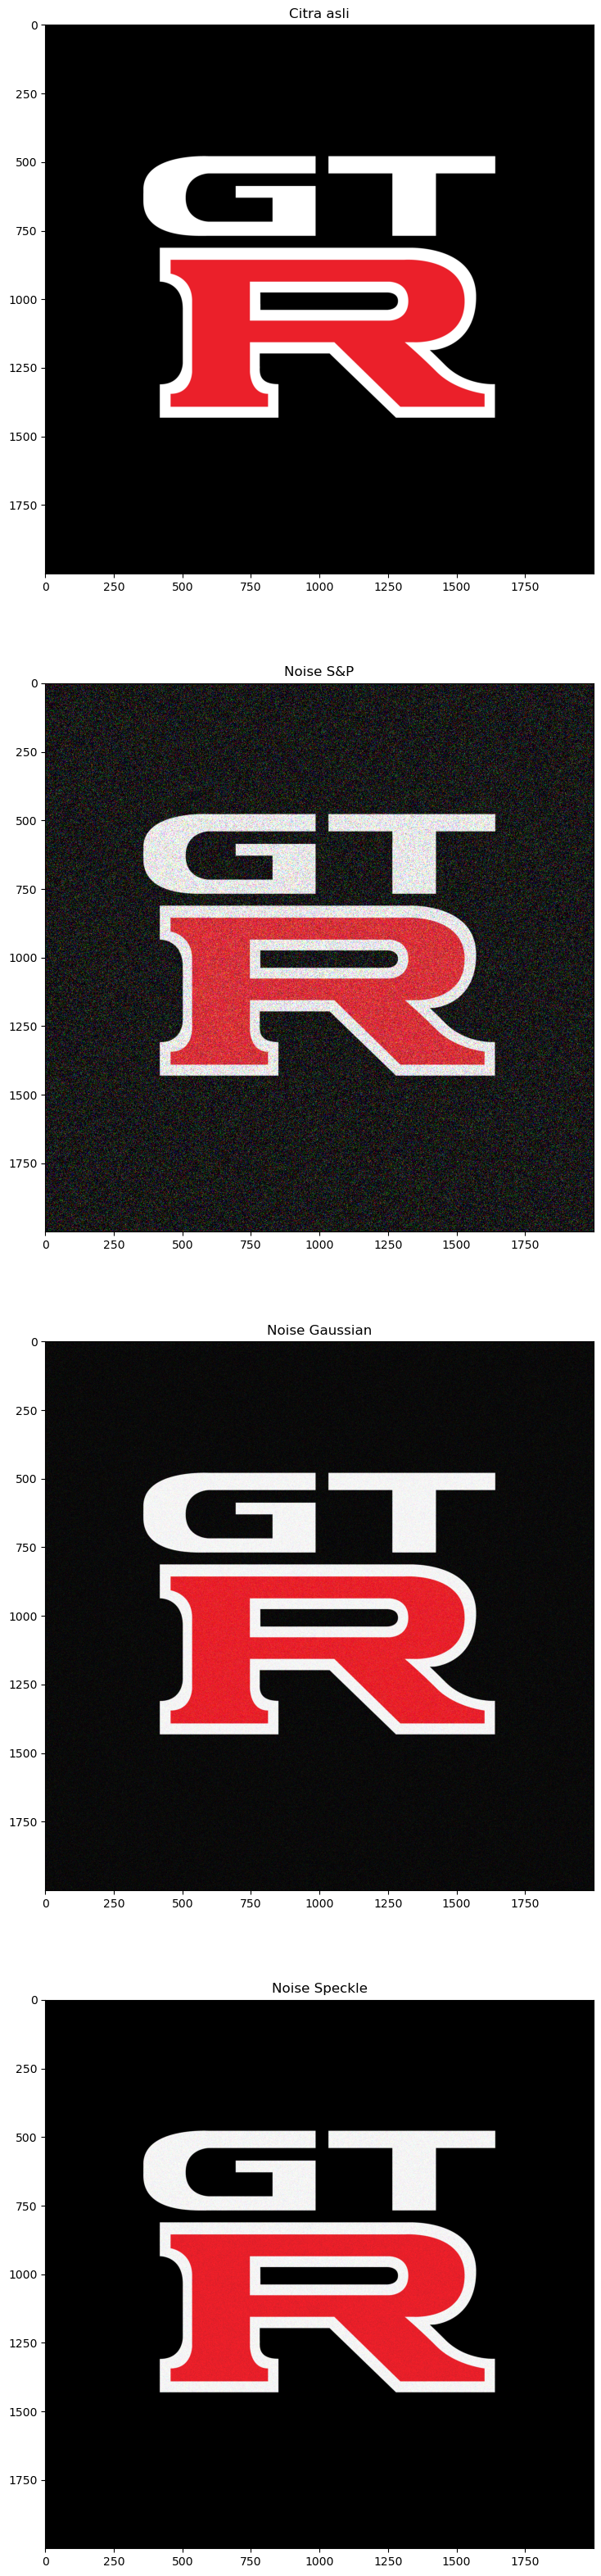

In [8]:
fig, axs = plt.subplots(4,1, figsize = (10,40))
ax = axs.ravel()

ax[0].imshow(citra_r, cmap = "gray")
ax[0].set_title('Citra asli')

ax[1].imshow(noise_img_snp, cmap = "gray")
ax[1].set_title('Noise S&P')

ax[2].imshow(noise_img_gaussian, cmap = "gray")
ax[2].set_title('Noise Gaussian')

ax[3].imshow(noise_img_speckle, cmap = "gray")
ax[3].set_title('Noise Speckle')

plt.show() #202331221_Muhammad Ihsan Hafizh

In [9]:
kernel_3_3 = np.ones((3,3), np.float32)/9 #202331221_Muhammad Ihsan Hafizh

In [10]:
img_snp_avg_filter = cv2.filter2D(noise_img_snp, cv2.CV_8U, kernel_3_3,
                                  (-1,-1), delta = 0,
                                  borderType = cv2.BORDER_DEFAULT)

img_snp_median_filter = cv2.medianBlur(noise_img_snp, 3) #202331221_Muhammad Ihsan Hafizh

In [11]:
img_gaussian_avg_filter = cv2.filter2D(noise_img_gaussian, cv2.CV_8U, kernel_3_3,
                                  (-1,-1), delta = 0,
                                  borderType = cv2.BORDER_DEFAULT)

img_gaussian_median_filter = cv2.medianBlur(noise_img_snp, 3) #202331221_Muhammad Ihsan Hafizh

In [12]:
img_speckle_avg_filter = cv2.filter2D(noise_img_speckle, cv2.CV_8U, kernel_3_3,
                                  (-1,-1), delta = 0,
                                  borderType = cv2.BORDER_DEFAULT)

img_speckle_median_filter = cv2.medianBlur(noise_img_snp, 3) #202331221_Muhammad Ihsan Hafizh

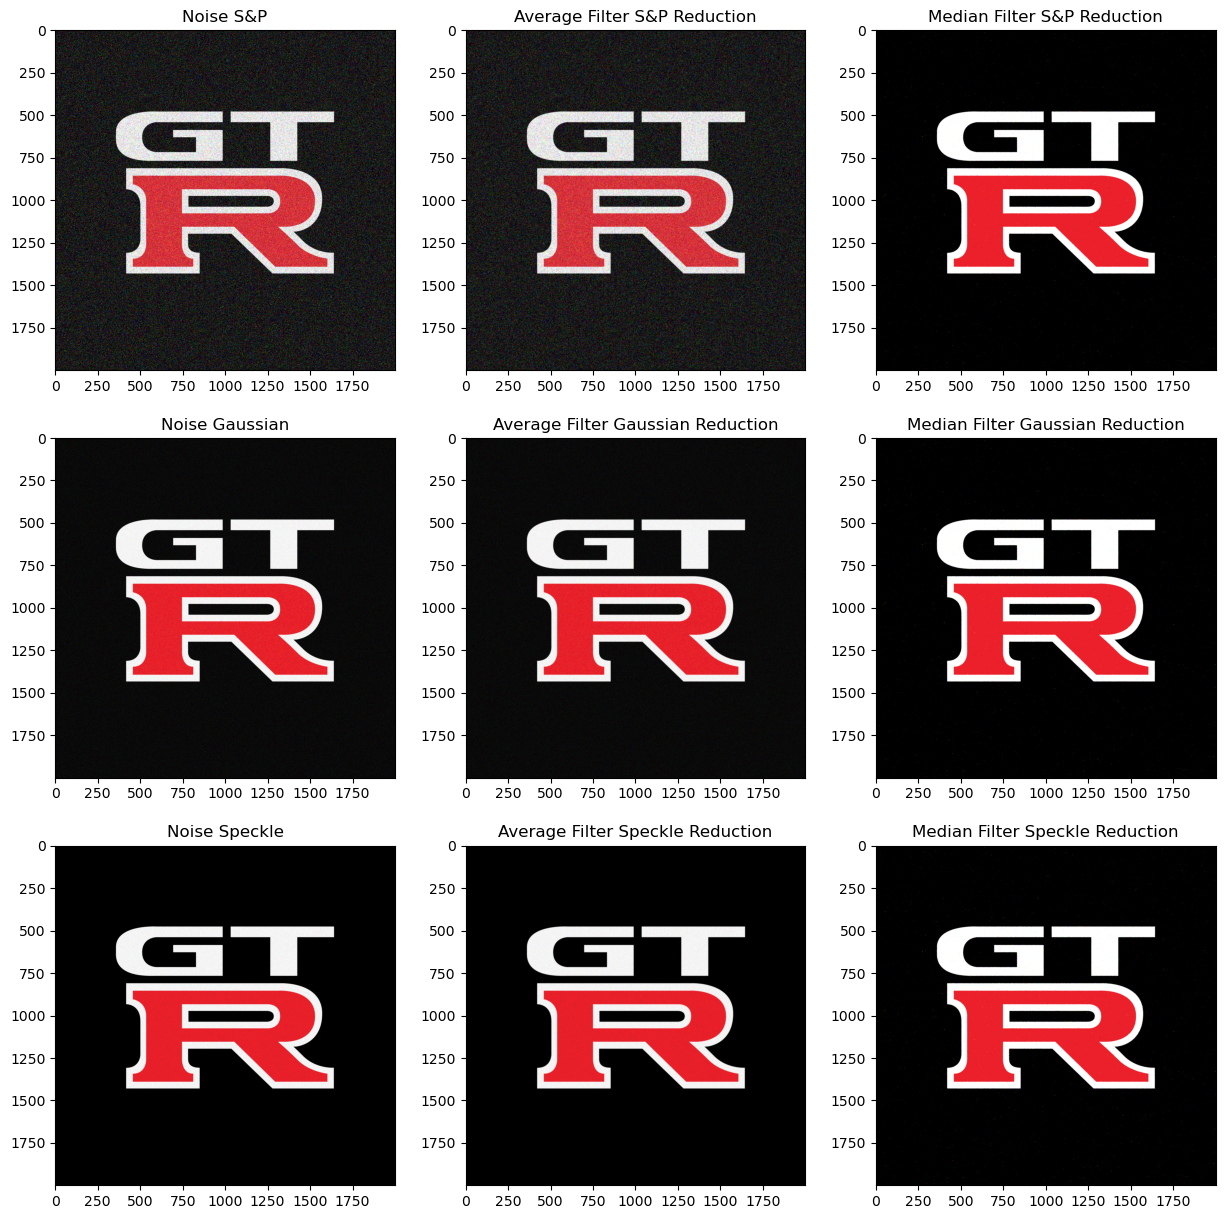

In [13]:
fig, axs = plt.subplots(3,3, figsize = (15,15))
ax = axs.ravel()

ax[0].imshow(noise_img_snp, cmap = "gray")
ax[0].set_title('Noise S&P')

ax[1].imshow(img_snp_avg_filter, cmap = "gray")
ax[1].set_title('Average Filter S&P Reduction')

ax[2].imshow(img_snp_median_filter, cmap = "gray")
ax[2].set_title('Median Filter S&P Reduction')


ax[3].imshow(noise_img_gaussian, cmap = "gray")
ax[3].set_title('Noise Gaussian')

ax[4].imshow(img_gaussian_avg_filter, cmap = "gray")
ax[4].set_title('Average Filter Gaussian Reduction')

ax[5].imshow(img_gaussian_median_filter, cmap = "gray")
ax[5].set_title('Median Filter Gaussian Reduction')


ax[6].imshow(noise_img_speckle, cmap = "gray")
ax[6].set_title('Noise Speckle')

ax[7].imshow(img_speckle_avg_filter, cmap = "gray")
ax[7].set_title('Average Filter Speckle Reduction')

ax[8].imshow(img_speckle_median_filter, cmap = "gray")
ax[8].set_title('Median Filter Speckle Reduction')

plt.show() #202331221_Muhammad Ihsan Hafizh

In [14]:
citra_m = cv2.imread("gtr.png")
citra_m = cv2.cvtColor(citra_m, cv2.COLOR_BGR2GRAY) #202331221_Muhammad Ihsan Hafizh

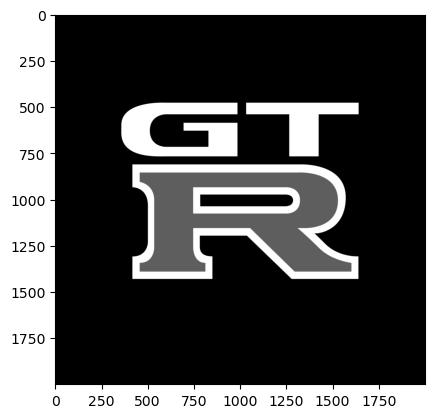

In [15]:
plt.imshow(citra_m, cmap = "gray") #202331221_Muhammad Ihsan Hafizh

In [16]:
copyCitra1 = citra_m.copy().astype(float) #202331221_Muhammad Ihsan Hafizh

m1, n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

print("Shape copy citra 1 : ", copyCitra1.shape)
print("Shape output citra 1 : ", output1.shape)

print("m1 : ", m1)
print("n1 : ", n1)

print()

Shape copy citra 1 :  (2000, 2000)
Shape output citra 1 :  (2000, 2000)
m1 :  2000
n1 :  2000



In [17]:
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] +copyCitra1[a1-1, b1+1] +\
        copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1+1] +\
        copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1]
        output1[a1, b1] = (1/9 * jumlah)

output1 = np.asarray(output1, dtype = np.uint8) #202331221_Muhammad Ihsan Hafizh

Text(0.5, 1.0, 'input citra 2')

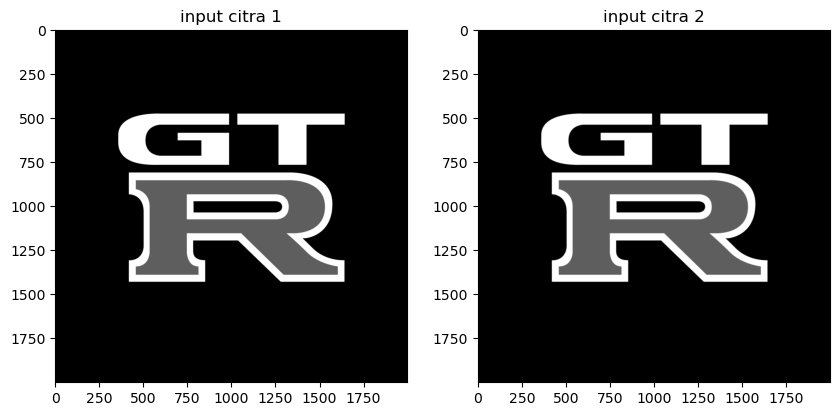

In [18]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra_m, cmap = "gray")
ax[0].set_title('input citra 1')

ax[1].imshow(output1, cmap = "gray")
ax[1].set_title('input citra 2') #202331221_Muhammad Ihsan Hafizh

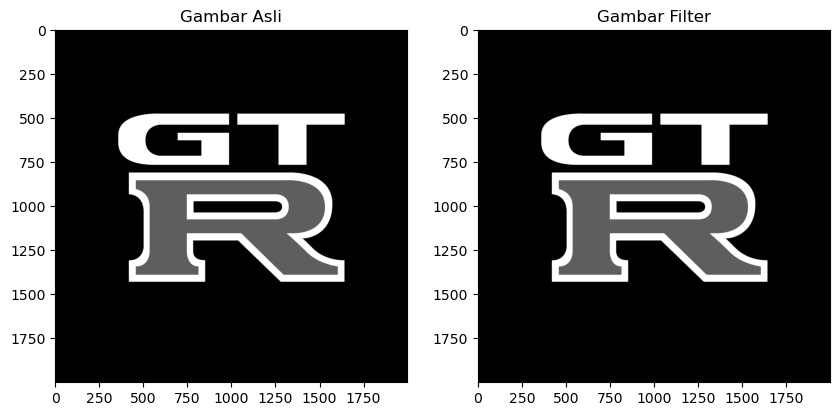

In [19]:
#Membuat filter median

citra_m2 = citra_m
img_median = citra_m2.copy()
img_median_after = cv2.medianBlur(img_median, 5)

fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(img_median, cmap = "gray")
ax[0].set_title('Gambar Asli')

ax[1].imshow(img_median_after, cmap = "gray")
ax[1].set_title('Gambar Filter')

plt.show() #202331221_Muhammad Ihsan Hafizh

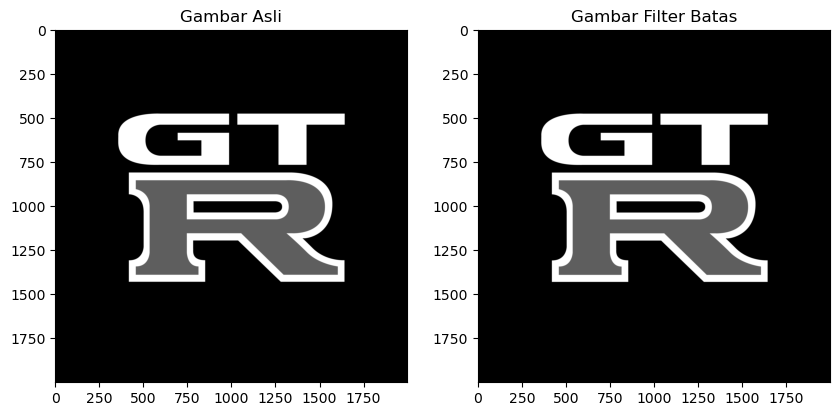

In [20]:
#Membuat filter batas
citra_m3 = citra_m
copyCitra3 = citra_m3.copy().astype(float) #202331221_Muhammad Ihsan Hafizh

m1,n1 = copyCitra3.shape
output3 = np.empty([m1-1,  n1-1])

for baris in range(1, m1-1):
    for kolom in range(1, n1-1):
        a1 = baris
        b1 = kolom
        arr = np.array([copyCitra3[a1-1, b1-1], copyCitra3[a1-1, b1], copyCitra3[a1-1, b1+1],
                        copyCitra3[a1,b1-1], copyCitra3[a1, b1+1],
                        copyCitra3[a1+1,b1-1], copyCitra3[a1+1, b1], copyCitra3[a1+1, b1+1]])

        minPixel = np.amin(arr)
        maxPixel = np.amax(arr)

        if (copyCitra3[baris, kolom] < minPixel):
            output3[baris, kolom] = minPixel
        else : 
            if (copyCitra3[baris, kolom] > maxPixel):
                output3[baris, kolom] = maxPixel
            else :
                output3[baris, kolom] = copyCitra3[baris, kolom]

output3 = np.asarray(output3, dtype=np.uint8)

fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(citra_m3, cmap = "gray")
ax[0].set_title('Gambar Asli')

ax[1].imshow(output3, cmap = "gray")
ax[1].set_title('Gambar Filter Batas')

plt.show()